In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Encodes categorical variables using LabelEncoder.
    """
    label_encoders = {}
    for column in data.columns:
        if data[column].dtype == 'object':
            label_encoders[column] = LabelEncoder()
            data[column] = label_encoders[column].fit_transform(data[column])
    return data, label_encoders

def naive_bayes_classifier(csv_file, target_column):
    # Load the dataset
    data = pd.read_csv(csv_file)
    
    # Preprocess the data
    data, label_encoders = preprocess_data(data)
    
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train a Gaussian Naive Bayes classifier
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders[target_column].classes_, yticklabels=label_encoders[target_column].classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Plot histogram of predicted class distribution
    plt.figure(figsize=(8, 6))
    plt.hist(y_pred, bins=len(label_encoders[target_column].classes_), edgecolor='black', alpha=0.7, align='mid')
    plt.title("Predicted Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(range(len(label_encoders[target_column].classes_)), label_encoders[target_column].classes_)
    plt.show()
    
    # Allow user to enter new input
    print("\nEnter new input values to predict:")
    user_input = {}
    for column in X.columns:
        value = input(f"{column} (Options: {list(label_encoders[column].classes_)}): ")
        user_input[column] = label_encoders[column].transform([value])[0]
    
    # Convert user input to DataFrame
    user_input_df = pd.DataFrame([user_input])
    
    # Predict using the model
    prediction = model.predict(user_input_df)[0]
    predicted_label = label_encoders[target_column].inverse_transform([prediction])[0]
    
    print(f"\nPredicted Output: {predicted_label}")
    
     # Plot scatter plot
    feature_x, feature_y = X.columns[:2]  # Select first two features for 2D scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=X[feature_x],
        y=X[feature_y],
        hue=y.map({val: label for val, label in enumerate(label_encoders[target_column].classes_)}),
        palette="Set1",
        s=100
    )
    plt.scatter(user_input[feature_x], user_input[feature_y], color='black', label='User Input', s=150, marker='X')
    plt.title("Scatter Plot of Features with User Input")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.show()

# Example CSV structure
# naive_bayes_classifier("path_to_dataset.csv", "Likes Basketball")


Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-Score: 0.87

Confusion Matrix:
[[26  2]
 [ 5 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.92      0.82      0.87        28

    accuracy                           0.88        56
   macro avg       0.88      0.88      0.87        56
weighted avg       0.88      0.88      0.87        56



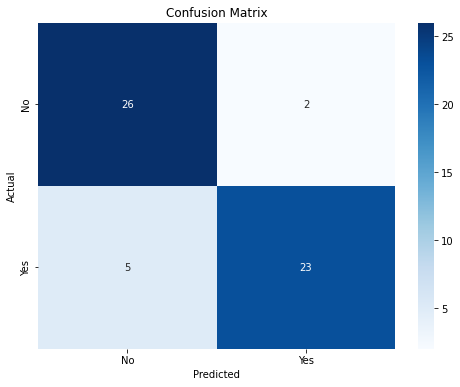

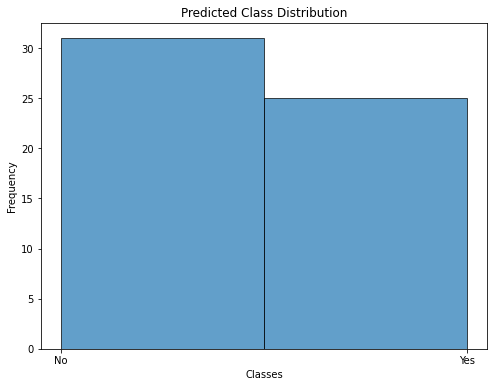


Enter new input values to predict:


Height (Options: ['Above Average', 'Above average', 'Average', 'Below Average', 'above average', 'average']):  Above Average
Weight (Options: ['Average', 'Heavy', 'Light', 'average']):  Light
Gender (Options: ['F', 'M', 'M ', 'm']):  F
Activity (Options: ['HIgh', 'High', 'Low', 'high', 'low']):  Low



Predicted Output: No


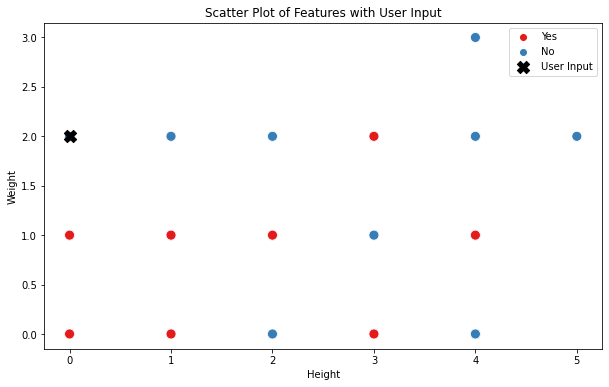

In [15]:
filename = 'data/naive_bayes_1.csv'

naive_bayes_classifier(filename, "Likes Basketball")
